In [1]:
# Krithika Rangaraj
# Datasett,representert informasjon om personer som har registrert seg som arbeidsledige i NAV
# Oppgaven: Velg ut ett av bruksområdene der du tror en kan skape verdi basert på innsikt fra datasettet, og presenter hvordan du ville ha gått frem for å skaffe og dele denne innsikten.
# Metode : Utforskende dataanalyse ved hjelp av Python

In [2]:
# Importerer biblioteksfiler
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Innhenting av data og lese csv-fil til pandas dataframe 
df = pd.read_csv('C:\\Users\\Krithika\\Desktop\\fiktivt_datasett_overgang_til_arbeid.csv')
df.head(5)

,ID,jobb_etter_6mnd,utdanning,sykdom_siste_aar,arbsoker_siste_aar,forerkort,arbeid_siste_2mnd,alder,fylke,yrke,kjonn
0,15,Nei,Høyere utd 4 år+,Nei,Ja,Ja,Nei,35,Vestfold,Annet,Mann
1,32,Nei,Grunnskole,Nei,Nei,Nei,Nei,30,Vestfold,Annet,Mann
2,34,Nei,Grunnskole,Nei,Nei,Nei,Nei,29,Vestfold,Høgskoleyrker,Kvinne
3,35,Nei,VGS ikke fullf,Nei,Ja,Ja,Nei,36,Vestfold,Høgskoleyrker,Mann
4,40,Nei,Høyere utd u4 år,Ja,Nei,Ja,Nei,40,Vestfold,Maskin og transportarbeidere,Mann


In [4]:
df.tail(5)

,ID,jobb_etter_6mnd,utdanning,sykdom_siste_aar,arbsoker_siste_aar,forerkort,arbeid_siste_2mnd,alder,fylke,yrke,kjonn
8817,7549,Ja,NaN,Nei,Nei,Ja,Ja,31,Ukjent,Maskin og transportarbeidere,Mann
8818,7662,Ja,NaN,Nei,Nei,Nei,Ja,31,Ukjent,"Salg, service og omsorg",Kvinne
8819,8112,Nei,Høyere utd u4 år,Nei,Nei,Nei,Nei,48,Ukjent,"Salg, service og omsorg",Kvinne
8820,8139,Nei,Grunnskole,Nei,Nei,Nei,Nei,34,Ukjent,Maskin og transportarbeidere,Mann
8821,8292,Nei,VGS fullf,Nei,Nei,Nei,Nei,30,Ukjent,"Salg, service og omsorg",Kvinne


In [5]:
# Bearbeider av data ( Data wrangling )
#1. Checking for null values.
df.isnull().sum()


ID                       0
jobb_etter_6mnd          0
utdanning             1182
sykdom_siste_aar         0
arbsoker_siste_aar       0
forerkort                0
arbeid_siste_2mnd        0
alder                    0
fylke                    0
yrke                     0
kjonn                    0
dtype: int64

In [6]:
#2. Checking for duplicates
df.duplicated().any()

False

In [7]:
# 3. Droping unneccessary column-->"ID" 
df.drop(columns ='ID', axis = 1 , inplace = True) 
df.head(5)

,jobb_etter_6mnd,utdanning,sykdom_siste_aar,arbsoker_siste_aar,forerkort,arbeid_siste_2mnd,alder,fylke,yrke,kjonn
0,Nei,Høyere utd 4 år+,Nei,Ja,Ja,Nei,35,Vestfold,Annet,Mann
1,Nei,Grunnskole,Nei,Nei,Nei,Nei,30,Vestfold,Annet,Mann
2,Nei,Grunnskole,Nei,Nei,Nei,Nei,29,Vestfold,Høgskoleyrker,Kvinne
3,Nei,VGS ikke fullf,Nei,Ja,Ja,Nei,36,Vestfold,Høgskoleyrker,Mann
4,Nei,Høyere utd u4 år,Ja,Nei,Ja,Nei,40,Vestfold,Maskin og transportarbeidere,Mann


In [8]:
#4. Replacing null values in "utdanning column"
df.replace(np.nan,'No record' , inplace = True)

In [9]:
# 5. Formatting  the data in "kjonn column"
print( 'After formatting:',df['kjonn'].unique() )

After formatting: ['Mann' 'Kvinne' 'M' 'F']


In [10]:
df['kjonn'] = df['kjonn'].replace('M','Mann')
df['kjonn'] = df['kjonn'].replace('F','Kvinne')


In [11]:
print( 'After formatting :',df['kjonn'].unique())

After formatting : ['Mann' 'Kvinne']


In [12]:
df['alder'].unique()

array([  35,   30,   29,   36,   40,   34,   39,   55,   32,   48,   49,
         54,   18,   51,   57,   37,   38,   42,   41,   25,   26,   47,
         43,   33,   53,   28,   24,   31,   44,   20,   27,   52,   45,
         21,   59,   50,   22,   19,   56,   46,   58,   60,   23, 9999],
      dtype=int64)

In [13]:
# 6. Dropping invalid row in "alder column(9999)"
df.drop(df[df['alder'] == 9999].index, inplace = True) 


(array([ 342.,  630., 1344., 1614., 1529., 1302.,  786.,  528.,  462.,
         284.]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <BarContainer object of 10 artists>)

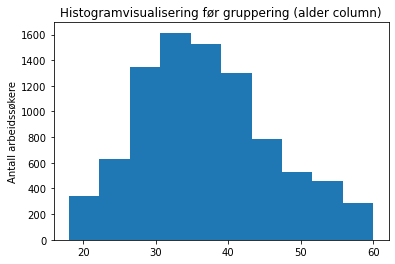

In [14]:
plt.title ('Histogramvisualisering før gruppering (alder column)')
plt.ylabel ('Antall arbeidssøkere')
plt.hist(df['alder'])
# Insikt : Visualisering er ikke bra for å se antall aldersgrupper. Derfor brukte 'binning metode'på neste steg.

In [15]:
#. 7. Binning : Converting  numeric into categorical  variables in "alder column"
group_alder = ['Tenåring 0 - 19 ','ungdommer 20 - 35 ','voksen 36 - 50 ','Senior voksen 51 - 70']
df['bin_alder']=pd.cut(df['alder'], bins=[0,19,35,50,100], labels = group_alder, include_lowest=True)
df.head(5)

,jobb_etter_6mnd,utdanning,sykdom_siste_aar,arbsoker_siste_aar,forerkort,arbeid_siste_2mnd,alder,fylke,yrke,kjonn,bin_alder
0,Nei,Høyere utd 4 år+,Nei,Ja,Ja,Nei,35,Vestfold,Annet,Mann,ungdommer 20 - 35
1,Nei,Grunnskole,Nei,Nei,Nei,Nei,30,Vestfold,Annet,Mann,ungdommer 20 - 35
2,Nei,Grunnskole,Nei,Nei,Nei,Nei,29,Vestfold,Høgskoleyrker,Kvinne,ungdommer 20 - 35
3,Nei,VGS ikke fullf,Nei,Ja,Ja,Nei,36,Vestfold,Høgskoleyrker,Mann,voksen 36 - 50
4,Nei,Høyere utd u4 år,Ja,Nei,Ja,Nei,40,Vestfold,Maskin og transportarbeidere,Mann,voksen 36 - 50


(array([4296.,    0.,    0., 3563.,    0.,    0.,  860.,    0.,    0.,
         102.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

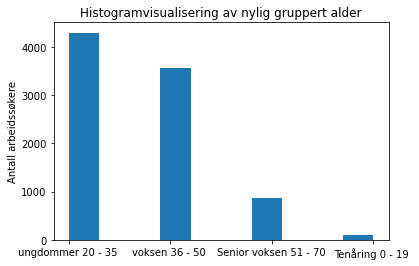

In [16]:
#visualisering av antall mot alder
plt.title ('Histogramvisualisering av nylig gruppert alder')
plt.ylabel ('Antall arbeidssøkere')
plt.hist(df['bin_alder'])
# Innsikt : Arbeidsledigheten er høy blant unge og voksen og det bør vurderes


In [17]:
# Dropping 'alder' columns etter binned  
df1 =df.drop('alder', axis=1)
df1.head(2)

,jobb_etter_6mnd,utdanning,sykdom_siste_aar,arbsoker_siste_aar,forerkort,arbeid_siste_2mnd,fylke,yrke,kjonn,bin_alder
0,Nei,Høyere utd 4 år+,Nei,Ja,Ja,Nei,Vestfold,Annet,Mann,ungdommer 20 - 35
1,Nei,Grunnskole,Nei,Nei,Nei,Nei,Vestfold,Annet,Mann,ungdommer 20 - 35


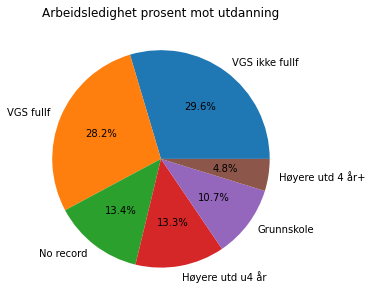

In [18]:
# Pie chart  visualisering av utdanning  % 
plt.figure(figsize =(5,5))
plt.title('Arbeidsledighet prosent mot utdanning')
plt.pie(df1['utdanning'].value_counts(), labels=df1['utdanning'].value_counts().index,autopct='%1.1f%%')
plt.show()
# Innsikt : 
# 1. VGS fullført og VGS ikke fullført er like høy prosenten. Høyere utdanning 4 år + er den laveste prosent. 
# 2. I tillegg var det ikke rekord for 13,4% utdanning i datasettet og det bør vurderes

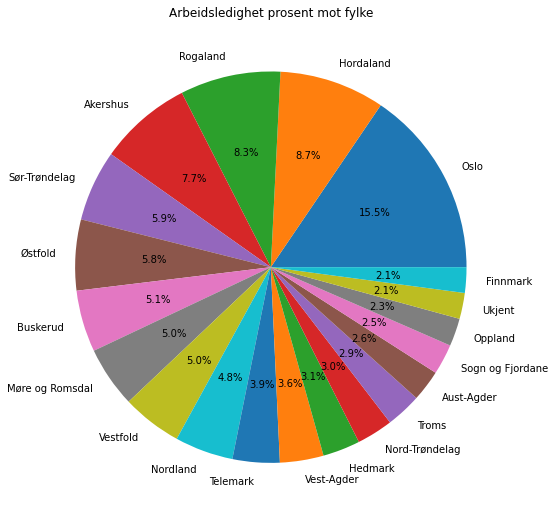

In [19]:
# - Pie chart  visualisering  fylke  % 
plt.figure(figsize =(9,9))
plt.title('Arbeidsledighet prosent mot fylke')
plt.pie(df1['fylke'].value_counts(), labels=df1['fylke'].value_counts().index,autopct='%1.1f%%')
plt.show()
#Innsikt
# 1. Den Oslo fylken har den høyeste arbeidsledighet prosenten(15.5%).Hordaland,Rogaland og Akershus har lik prosent(Gjennomsnitt:8.2%)
# 2. Fylker som Finnmark,Oppland er lav prosent.
# 3. I tillegg har det  2.1% ukjent fylke som  bør vurderes.

Text(0.5, 1.0, 'Yrker antall ')

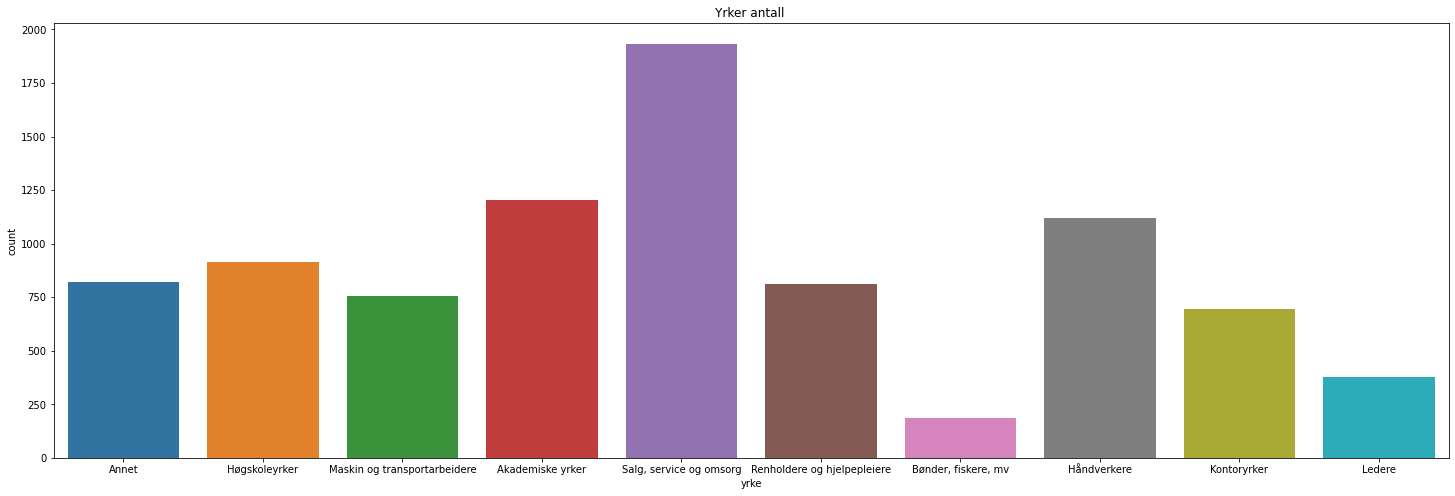

In [20]:
# Visualisering yrker teller 
plt.figure(figsize =(25,8))
sns.countplot(x=df1['yrke'], data = df1).set_title('Yrker antall ')

# Innsikt :  
# 1. Den høyeste yrken som jobbsøker har i salg,service og omsorg(Gjennomsnitt : 1800).
# 2. Renholdere og hjelpepleiere har lik antall(Gjennomsnitt :1200).
# 3. Bøndere og fiskere de den laveste yrken (Gjennomsnitt :200).

Text(0.5, 1.0, 'Alder Vs Fylker')

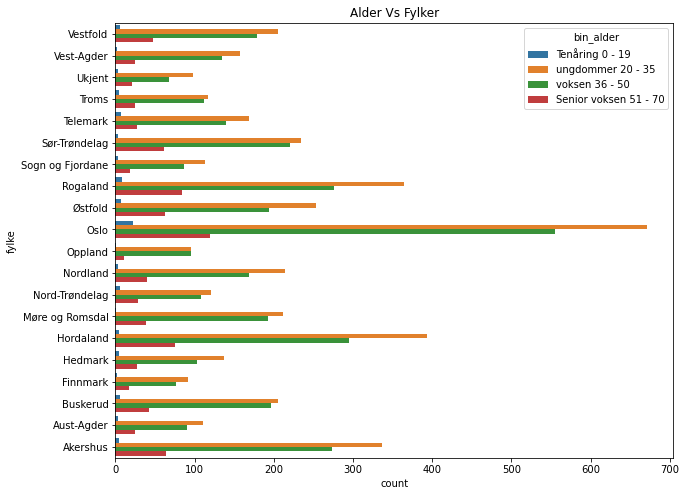

In [21]:
# Visualisering alder teller mot fylker

plt.figure(figsize=(10,8))

sns.countplot(y="fylke", hue="bin_alder", data=df1).set_title('Alder Vs Fylker')
#Innsikt : 
# 1. Arbeidsledighet er høy i alle flyker blant unge og voksen og lavt antall i senior voksen gruppe
# 2. Oslo har høyest antall blant unge og voksen(omtrent : 1200)
# 3. Rogaland og Hordaland er neste høyset antall blant unge og voksen(omtrent : 800)

Text(0.5, 1.0, 'Flyke vs jøbsøkere antall(jobbet 6 mnd etter registreing)')

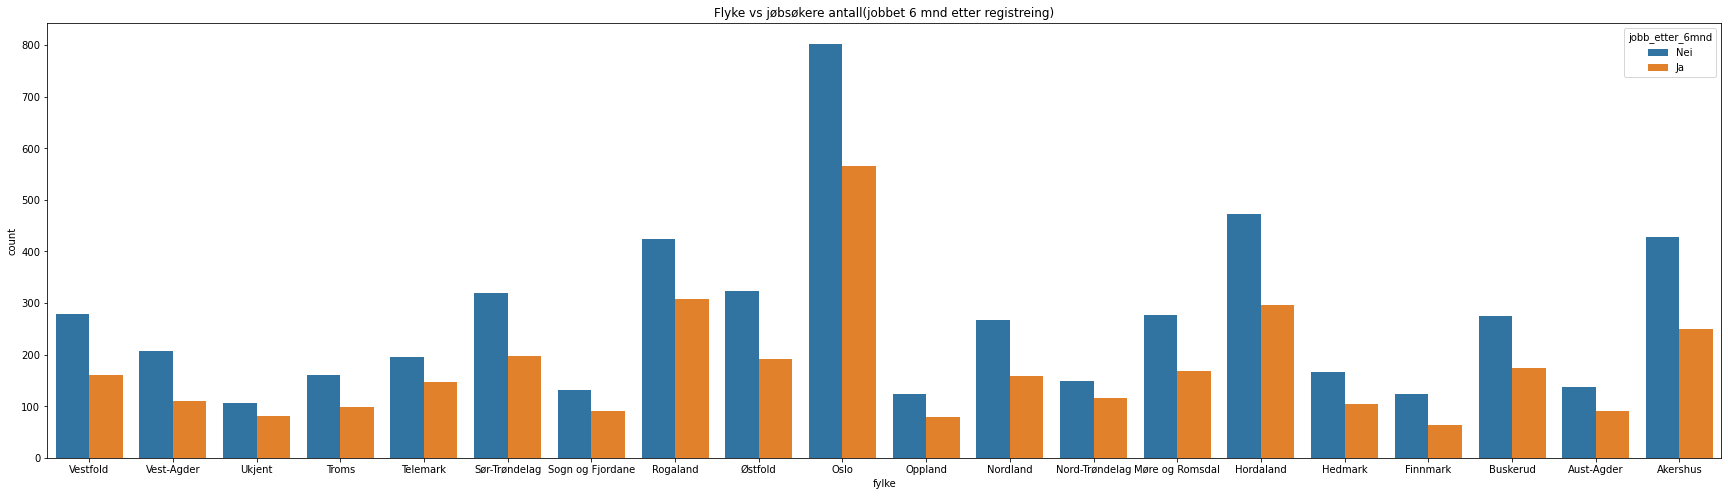

In [22]:
plt.figure(figsize=(30,8))
sns.countplot(x="fylke", hue="jobb_etter_6mnd", data=df1).set_title('Flyke vs jøbsøkere antall(jobbet 6 mnd etter registreing)')
# Innsikt : I alle flyker jobbet jøbsøkere i 6 måneder etter de registreing seg. Men antall for de som ikke jobbet er høy

<AxesSubplot:xlabel='utdanning', ylabel='count'>

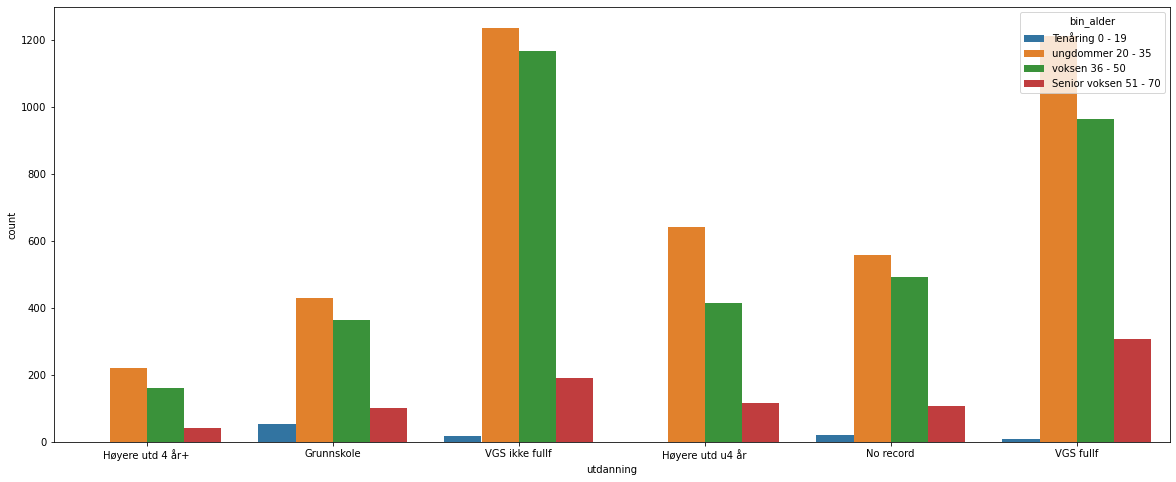

In [23]:
plt.figure(figsize=(20,8))
sns.countplot(x="utdanning", hue="bin_alder", data=df1)
#Innsikt : 
# 1. Ungdommer som ikke har fullfort VGS er høy (Gjennomsnitt :1200).
# 2. Voksner som fullfort VGS er lik høy (Gjennomsnitt : 975)

Text(0.5, 1.0, 'Muligheter mellom VGS og Høyere Utdanning etter 6 mnd')

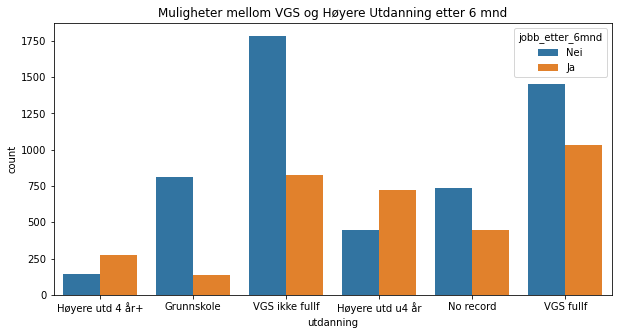

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x="utdanning", hue="jobb_etter_6mnd", data=df1).set_title('Muligheter mellom VGS og Høyere Utdanning etter 6 mnd')
# Innskit :  
# 1.selv om antall er lav for de som har høyere utdanning under 4 år og 4 år+, fikk de mer muligheter i 6 måneder etter de registreing seg 
# 2.Selv om de som har fullfort VGS og ikke fullfort VGS har høy antall, fikk de mindre muligheter enn de som har høyere utdanning

Text(0.5, 1.0, 'Yrker Vs Forerkort')

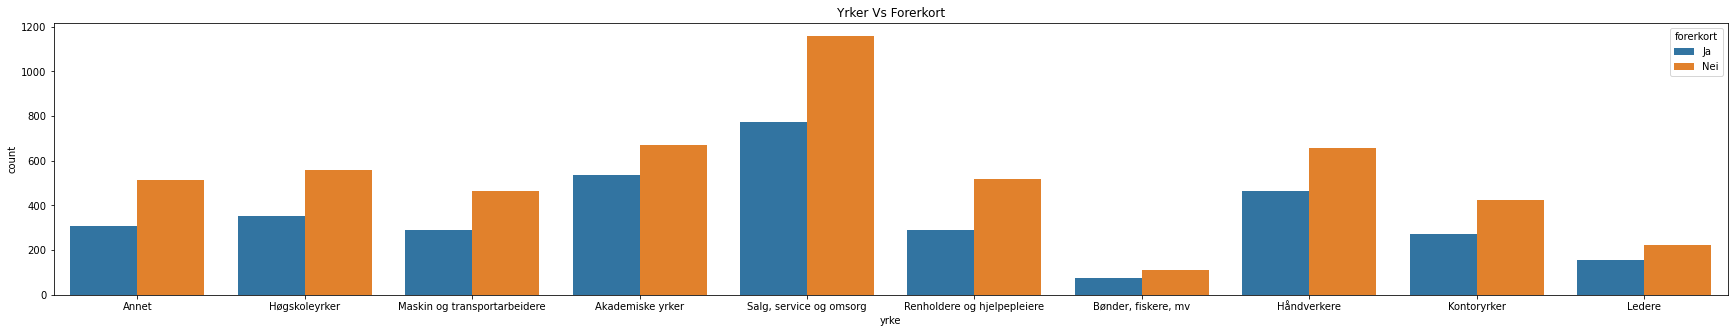

In [25]:
# Visualisering for forerkort mot yrker
plt.figure(figsize=(30,5))
sns.countplot(x='yrke', hue="forerkort", data=df1).set_title('Yrker Vs Forerkort')
# Innsikt : Bare 50% av jobbsøkere som maskiner og transportarbeidere har førerkort

In [26]:
# Visualisering for antall og % før og etter arbeidsledig-registreringen  
print('Jobbet siste 2 måneder før  arbeidsledig-registreringen')
counts =  df1["arbeid_siste_2mnd"].value_counts()
percent100 = df1["arbeid_siste_2mnd"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
arbeid_siste_2mnd_conditions=pd.DataFrame({'counts': counts, 'Percent': percent100})
print(arbeid_siste_2mnd_conditions)
print('----------------------')

counts =  df1["jobb_etter_6mnd"].value_counts()
percent100 = df1["jobb_etter_6mnd"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print('Jobbet i 6 måneder etter arbeidsledig-registreringen')
jobb_etter_6mnd_conditions1=pd.DataFrame({'counts': counts, 'Percent': percent100})
print(jobb_etter_6mnd_conditions1)
print('----------------------')


counts =  df1["arbsoker_siste_aar"].value_counts()
percent100 = df1["arbsoker_siste_aar"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print(' Arbeidssøker i året før den aktuelle arbeidsledig-registreringen')
arbsoker_siste_aar_conditions3=pd.DataFrame({'counts': counts, 'Percent': percent100})
print(arbsoker_siste_aar_conditions3)

print('----------------------')

#Innsikt
# 75% av personene i datasettet var ikke arbeidssøkere tidligere da de registrerte seg
# 60.9% av personene i datasettet var ikke på jobben i 6 måneder etter  de registrerte seg
# 60.2% av personene i datasettet var ikke på jooben i de siste 2 måneder da de registrerte seg

Jobbet siste 2 måneder før  arbeidsledig-registreringen
     counts Percent
Nei    5310   60.2%
Ja     3511   39.8%
----------------------
Jobbet i 6 måneder etter arbeidsledig-registreringen
     counts Percent
Nei    5370   60.9%
Ja     3451   39.1%
----------------------
 Arbeidssøker i året før den aktuelle arbeidsledig-registreringen
     counts Percent
Nei    6613   75.0%
Ja     2208   25.0%
----------------------


In [27]:
#Converting  categorical into numeric variables for find korrelasjon

df['sykdom_siste_aar_new'] = np.where(df['sykdom_siste_aar'] == 'Ja', True,False)
df['jobb_etter_6mnd_new'] = np.where(df['jobb_etter_6mnd'] == 'Ja', True,False)
df['arbsoker_siste_aar_new'] = np.where(df['arbsoker_siste_aar'] == 'Ja', True,False)
df['forerkort_int'] = np.where(df['forerkort'] == 'Ja', True,False)
df['arbeid_siste_2mnd_new'] = np.where(df['arbeid_siste_2mnd'] == 'Ja', True,False)

df.head(5)

,jobb_etter_6mnd,utdanning,sykdom_siste_aar,arbsoker_siste_aar,forerkort,arbeid_siste_2mnd,alder,fylke,yrke,kjonn,bin_alder,sykdom_siste_aar_new,jobb_etter_6mnd_new,arbsoker_siste_aar_new,forerkort_int,arbeid_siste_2mnd_new
0,Nei,Høyere utd 4 år+,Nei,Ja,Ja,Nei,35,Vestfold,Annet,Mann,ungdommer 20 - 35,False,False,True,True,False
1,Nei,Grunnskole,Nei,Nei,Nei,Nei,30,Vestfold,Annet,Mann,ungdommer 20 - 35,False,False,False,False,False
2,Nei,Grunnskole,Nei,Nei,Nei,Nei,29,Vestfold,Høgskoleyrker,Kvinne,ungdommer 20 - 35,False,False,False,False,False
3,Nei,VGS ikke fullf,Nei,Ja,Ja,Nei,36,Vestfold,Høgskoleyrker,Mann,voksen 36 - 50,False,False,True,True,False
4,Nei,Høyere utd u4 år,Ja,Nei,Ja,Nei,40,Vestfold,Maskin og transportarbeidere,Mann,voksen 36 - 50,True,False,False,True,False


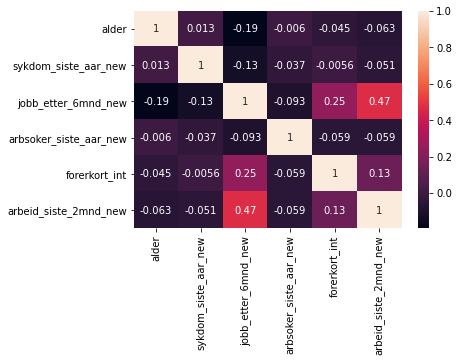

In [28]:
# Visualisering av korrelasjon via korrelasjonsmatrise
sns.heatmap(df.corr(), annot = True)
plt.show()
#Innsikt : Positiv korrelasjon mellom de som var i jobb 6mnd etter arbeidsledig-registreringen og de som var i arbeid i løpet av de siste to månedene før arbeidsledig-registreringen 

In [29]:
# KONKLUSJON : basert på min anlaysering

# Arbeidsledighet er høy blant ungdommer(Alder :20-35: 4200) og voksen (Alder : 36 -50 :3500)
# Arbeidsledighet er høy  i Oslo blant ungdommer og voksen(omtrent : 1200).Rogaland og Hordaland er neste høyset antall(omtrent : 800).I tillegg er 2.1% fylke ukjent  
# Arbeidsledighet er tilsvarende lik prosentandel blant VGS fullført(28.2) og VGS ikke fullført(29.6).Høyere utdanning 4 år + er den laveste prosent(4.8). I tillegg er 13,4% utdanning i datasettet ukjent   
# 75%(6613)av personene  var ikke arbeidssøkere i året før den aktuelle arbeidsledig-registreringen.
# Gj.an :39.45%(5340) av personene var i jobb før og etter den aktuelle arbeidsledig-registreringen.
# De som var i arbeid i løpet av de siste to månedene før arbeidsledig-registreringen,var i jobb i 6mnd etter arbeidsledig-registreringen.
# Den høyeste yrken som jobbsøker har i salg,service og omsorg(Antall : 1800).Renholdere og hjelpepleiere har lik antall(Antall :1200).
# Bare 50% av jobbsøkere på maskin og transport har førerkort.


In [30]:
#FORSLAG: En av grunnene for arbeidsledighet er lav utdanning blant jobsøkere.

# 1. Nav kan fokus mer på arbeisdøkere som ikke fullfort VGS og de som fullfort VGS.Nav kan anbefale å fullføre VGS for de som ikke fullfort VGS
#    og anbefale å fullføre fagskole for de som fullfort VGS.
# 2. Nav kan fokus mer på folk som er mellom 25 -40 alder siden arbeidsledighet er høy bland denne gruppen.
# 3. Karrier veileidening for de som har høyere utdanning vil hjelp dem å kommeg seg til praksis eller jobb siden de har good utdanning.
# 4. Nav kan anbefale å ta førerkort for de som jobbet med maskin og transport for bedre muligheten.
# 5. Nav kan fokus på de 60.55% jøbsøkere som ikke komme seg til jobb før og etter arbeidsledig-registreringen for å vite hva de mangel på. 
# 6. Ukjent utdanning og Ukjent fylker bør vuderes for å fa bedre veiledering.F.ek ,Nødvendig UI-skjermendring for å forbedre ukjente datasett
# 7. 